In [4]:
#uncomment if not installed
#pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta as rd

ModuleNotFoundError: No module named 'yfinance'

In [3]:
#pip install yfinance

  Using cached yfinance-0.2.32-py2.py3-none-any.whl (68 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached lxml-4.9.3.tar.gz (3.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached frozendict-2.3.9-cp310-cp310-macosx_10_9_x86_64.whl (36 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached pandas-2.1.3-cp310-cp310-macosx_10_9_x86_64.whl (11.7 MB)
  Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-macosx_10_9_x86_64.whl (122 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
Using legacy 'setup.py install' for lxml, since package 'wheel' is not installed.
  Running setup.py install for lxml ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for lxml did not run successfully.
  │ exit code: 1
  ╰─> [119 lines of output]
      Building lxml version 4.9.3.
      Building without Cyt

In [17]:
#dfpep = pd.read_csv("/Users/zachazherman/Documents/4th Year Classes/MA477/PEP.csv")

In [18]:
dfpep.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
#pick a stock for the regime model based on users input ticker
#calculate intraday, overnight, and daily returns
def grabstock(symbol):
    ticker = yf.Ticker(symbol)
    df = ticker.history(period = 'max')
    df['Intradayreturn'] = df.Close/df.Open-1
    overnightreturns = []
    df['overnight_return'] = (df.Open-df.Close)/df.Close
    df['daily_return'] = df['overnight_return'] + df['Intradayreturn']
    df['log_return'] = np.log(df['daily_return'])
    return df

def regime(symbol):
    ticker = yf.Ticker(symbol)
    df = ticker.history(period = 'max')
    first_last = df.iloc[[0, -1]]
    start_per = first_last['Date'].iloc[0]
    end_per = first_last['Date'].iloc[1]
    our_rate = (first_last['Close'].iloc[0]/first_last['Close'].iloc[-1])*100
    #grab the SPY information for the same period
    spy = yf.Ticker('SPY')
    df2 = spy.history(period = 'max')
    spy_per = df2.loc[(df2['Date'] == start_per) & (df2['Date']== end_per)]
    spy_rate = (spy_per['Close'].iloc[0]/spy_per['Close'].iloc[-1])*100
    #determine if stock outpaces spy over the same period of time (beats SP500)
    if our_rate >= spy_rate:
        return 'bull'
    else:
        return 'bear'

grabstock('AAPL')
    

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intradayreturn,overnight_return,daily_return
Date,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0,0.000000,0.000000,0.000000e+00
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0,-0.004566,0.004587,2.094345e-05
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0,-0.004926,0.004950,2.438333e-05
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0,0.000000,0.000000,0.000000e+00
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,185.820007,186.029999,184.210007,184.800003,43627500,0.0,0.0,-0.005489,0.005520,3.029769e-05
2023-11-14 00:00:00-05:00,187.699997,188.110001,186.300003,187.440002,60108400,0.0,0.0,-0.001385,0.001387,1.921329e-06
2023-11-15 00:00:00-05:00,187.850006,189.500000,187.779999,188.009995,53790500,0.0,0.0,0.000852,-0.000851,7.247444e-07


In [35]:
dfpep = dfpep.assign(Intradayreturn=lambda x: (x.Close/x.Open - 1))
dfpep

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Intradayreturn
0,2018-11-07,115.449997,115.769997,114.440002,115.610001,100.327774,4219600,0.001386,0.001386
1,2018-11-08,115.379997,116.500000,115.250000,116.059998,100.718292,2925100,0.005894,0.005894
2,2018-11-09,116.080002,117.709999,116.080002,117.480003,101.950584,5026300,0.012061,0.012061
3,2018-11-12,117.000000,118.320000,116.709999,116.970001,101.507988,4781900,-0.000256,-0.000256
4,2018-11-13,117.750000,117.750000,116.209999,117.139999,101.655510,3609900,-0.005180,-0.005180
...,...,...,...,...,...,...,...,...,...
1252,2023-10-31,162.949997,163.350006,161.660004,163.279999,163.279999,5947400,0.002025,0.002025
1253,2023-11-01,163.669998,165.429993,162.759995,164.869995,164.869995,6682500,0.007332,0.007332
1254,2023-11-02,164.740005,167.160004,164.669998,166.830002,166.830002,5413400,0.012687,0.012687
1255,2023-11-03,168.679993,168.809998,166.690002,166.789993,166.789993,4063000,-0.011205,-0.011205


In [49]:
overnightreturns = []
amountrows = 1257
# Loop over each ticker
for i in range(0,amountrows):
    #Calculate the overnight return
    if i != 0:
        ret = (dfpep.iat[int(i), 1] - dfpep.iat[int(i-1), 4]) / dfpep.iat[int(i-1), 4]
        overnightreturns.append(ret)
    else:
        ret = 0
        overnightreturns.append(ret)

dfpep['overnight_return'] = pd.Series(overnightreturns)
dfpep['daily_return'] = dfpep['overnight_return'] + dfpep['Intradayreturn']
dfpep

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Intradayreturn,overnight_return,daily_return
0,2018-11-07,115.449997,115.769997,114.440002,115.610001,100.327774,4219600,0.001386,0.001386,0.000000,0.001386
1,2018-11-08,115.379997,116.500000,115.250000,116.059998,100.718292,2925100,0.005894,0.005894,-0.001989,0.003904
2,2018-11-09,116.080002,117.709999,116.080002,117.480003,101.950584,5026300,0.012061,0.012061,0.000172,0.012233
3,2018-11-12,117.000000,118.320000,116.709999,116.970001,101.507988,4781900,-0.000256,-0.000256,-0.004086,-0.004342
4,2018-11-13,117.750000,117.750000,116.209999,117.139999,101.655510,3609900,-0.005180,-0.005180,0.006668,0.001488
...,...,...,...,...,...,...,...,...,...,...,...
1252,2023-10-31,162.949997,163.350006,161.660004,163.279999,163.279999,5947400,0.002025,0.002025,0.004129,0.006154
1253,2023-11-01,163.669998,165.429993,162.759995,164.869995,164.869995,6682500,0.007332,0.007332,0.002389,0.009720
1254,2023-11-02,164.740005,167.160004,164.669998,166.830002,166.830002,5413400,0.012687,0.012687,-0.000788,0.011898
1255,2023-11-03,168.679993,168.809998,166.690002,166.789993,166.789993,4063000,-0.011205,-0.011205,0.011089,-0.000116


In [52]:
print(dfpep["daily_return"].mean())
print(dfpep["daily_return"].std())

0.00038469341970763917
0.01379114270859541


In [20]:
# Parameters for the bull market regime
mu_bull = 0.0006  # Mean return
volatility_bull = 0.01  # Volatility

# Parameters for the bear market regime
mu_bear = -0.0003  # Mean return
volatility_bear = 0.03  # Volatility



In [60]:
# Transition probabilities
p_bull_to_bull = 0.7
p_bear_to_bear = 0.9

In [61]:
# Initial state
current_state = "bull"
num_simulations = 100
initialprice = 100
num_days = 252
simulated_prices = np.zeros((num_simulations, num_days))

In [62]:
for i in range(num_simulations):
    current_state = "bull"
    daily_returns = np.zeros(num_days)
    for day in range(num_days):t
        if current_state == "bull":
            return_bull = np.random.normal(mu_bull, volatility_bull)
            daily_returns[day] = return_bull

            if np.random.rand() > p_bull_to_bull:
                current_state = "bear"
        else:
            return_bear = np.random.normal(mu_bear, volatility_bear)
            daily_returns[day] = return_bear

            if np.random.rand() > p_bear_to_bear:
                current_state = "bull"
    simulated_prices[i] = initial_price * np.cumprod(1 + daily_returns)
    


In [65]:
np.cumprod(1 + daily_returns) 
simulated_prices

array([[1.07234087e+02, 1.45262147e+02, 1.97457081e+02, ...,
        9.02016769e-01, 7.57047235e-01, 4.59090271e-01],
       [1.08183216e+02, 7.06075815e+01, 4.88023288e+01, ...,
        1.13557357e+05, 1.13385627e+05, 1.21889013e+05],
       [1.24494483e+02, 1.67241763e+02, 8.92430017e+01, ...,
        2.41327870e+00, 3.12997713e+00, 3.21681409e+00],
       ...,
       [8.51967317e+01, 9.10214517e+01, 7.52185979e+01, ...,
        7.49199293e+00, 5.70399831e+00, 7.12900268e+00],
       [9.19354069e+01, 8.26685983e+01, 1.12145428e+02, ...,
        2.51001377e+01, 2.72492469e+01, 2.61424263e+01],
       [7.90800295e+01, 7.03071617e+01, 8.26572602e+01, ...,
        5.11226498e+04, 3.91502592e+04, 3.37002514e+04]])

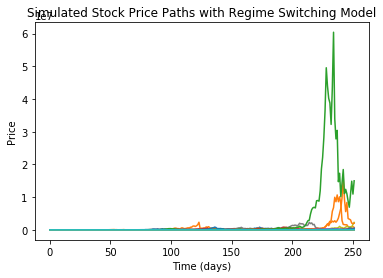

In [63]:
for i in range(num_simulations):
    plt.plot(simulated_prices[i])

plt.title("Simulated Stock Price Paths with Regime Switching Model")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.show()

